# Tutorial: Hello Bash and Python

In this tutorial we will familiarise ourselves with bash and python, and Notebooks (inadvertantly). Please load this notebook in `colab.research.google.com` if you do not have a local instance of JupyterHub/JupyterLab running.


Submission:

The submission for this tutorial requires a submission on Git, as well as one on SUNLearn.




In [70]:
import pandas as pd

## Question 1: Bash

Retrieve data and interogate it with bash before using python tooling. This is useful as you may struggle with type or malformed files and a quick interogation may reveal those issues.


### Question 1.1

Run the bash command `wget` to retrieve a file located at `https://storage.googleapis.com/bdt-beam/users_v.csv` [1]

In [73]:
!wget https://storage.googleapis.com/bdt-beam/users_v.csv

--2025-09-02 19:49:13--  https://storage.googleapis.com/bdt-beam/users_v.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.207, 173.194.217.207, 192.178.219.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143675 (140K) [text/csv]
Saving to: ‘users_v.csv’

users_v.csv         100%[===================>] 140.31K   561KB/s    in 0.3s    

2025-09-02 19:49:14 (561 KB/s) - ‘users_v.csv’ saved [143675/143675]



### Question 1.2

Use a bash command to view the top ten elements of the file (to confirm that things are as you expect) [1]

In [74]:
!head -n 10 users_v.csv

user_id,name,gender,age,address,date_joined
1,Anthony Wolf,male,73,New Rachelburgh-VA-49583,2019/03/13
2,James Armstrong,male,56,North Jillianfort-UT-86454,2020/11/06
3,Cody Shaw,male,75,North Anne-SC-53799,2004/05/29
4,Sierra Hamilton,female,76,New Angelafurt-ME-46190,2005/08/26
5,Chase Davis,male,31,South Bethmouth-WI-18562,2018/04/30
6,Sierra Andrews,female,21,Ryanville-MI-69690,2007/05/25
7,Ann Stone,female,41,Smithmouth-SD-17340,2005/01/05
8,Karen Santos,female,34,Mariaville-AK-29888,2003/12/12
9,Ronald Meyer,male,41,North Cherylhaven-NJ-04197,2015/11/14


### Question 1.3

Use a bash command to determine the number of rows in the file [1]

In [75]:
!wc -l users_v.csv

2358 users_v.csv


### Question 1.4

Suppose the file is too large for initial exploration, let's take a quick sample so that we can continue working to see what is in the data set. Loading it into Pandas at this point will mean that we are using all that memory in any case, so let's sample it before we load it.

Take a random sample of the file (limited the result to 1000 lines) and create another file called `users_sample.csv`, using only bash commands [3]

Hint: redirect a stream into a the output file.

In [76]:
!head -n 1 users_v.csv > users_sample.csv
!tail -n +2 users_v.csv | shuf -n 999 >> users_sample.csv

### Question 1.5

* Sort your file by ascending `user_id`s [1]
* Overwrite the current `users_sample.csv` with the ordered content [1]
* Print the last ten lines of this file [1]

In [77]:
!{ head -n 1 users_sample.csv && tail -n +2 users_sample.csv | sort -t, -k1,1n ; } > users_sample_sorted.csv
!mv users_sample_sorted.csv users_sample.csv

In [78]:
!tail users_sample.csv

2337,Tonya Sherman,female,60,South Coreymouth-DC-11431,2008/02/02
2340,Taylor Hall,female,53,East Caseymouth-CO-23652,2013/10/24
2341,Yvonne Watkins,female,44,Port Stephanie-NY-04187,2013/03/02
2344,Mary Gray,female,74,West Jeffreystad-ID-25109,2000/03/23
2347,Clayton Mendoza,male,54,Barajasview-VA-48348,2009/03/08
2352,Nancy Clark,female,80,Jamesshire-AK-88437,2001/12/12
2354,Allison Schmidt,female,43,Port Logan-MD-38588,2008/11/30
2355,Christopher Johnson,male,68,North Justinton-VA-32798,2006/08/01
2356,Mark Brown,male,67,New Kayleefurt-MA-82581,2013/11/16
2357,Steven Robinson,male,45,Mistytown-HI-31737,2015/03/21


## Question 2: Python

Perform analysis with Python

### Question 2.1

Load the original `users_v.csv` into a Pandas dataframe [1]

In [79]:
df = pd.read_csv("users_v.csv")

### Question 2.2

Display/print the top ten lines of the dataframe [1]



In [80]:
df.head(10)

,user_id,name,gender,age,address,date_joined
0,1,Anthony Wolf,male,73,New Rachelburgh-VA-49583,2019/03/13
1,2,James Armstrong,male,56,North Jillianfort-UT-86454,2020/11/06
2,3,Cody Shaw,male,75,North Anne-SC-53799,2004/05/29
3,4,Sierra Hamilton,female,76,New Angelafurt-ME-46190,2005/08/26
4,5,Chase Davis,male,31,South Bethmouth-WI-18562,2018/04/30
5,6,Sierra Andrews,female,21,Ryanville-MI-69690,2007/05/25
6,7,Ann Stone,female,41,Smithmouth-SD-17340,2005/01/05
7,8,Karen Santos,female,34,Mariaville-AK-29888,2003/12/12
8,9,Ronald Meyer,male,41,North Cherylhaven-NJ-04197,2015/11/14
9,10,Steven Rivera,male,43,Wayneside-VT-29040,2003/05/15


### Question 2.3

Find the age of the oldest and youngest person in the dataset [1]

Hint: you can use the `print(..., ...)` function to display the two values if you construct it as two arguments

In [81]:
print(df.age.max(), df.age.min())

80 18


### Question 2.4

Draw descriptive statistics (one-liner) for the `age` column - these statistics should include `count`, `mean`, and `std` [1]

Hint: this command has a parallel in R

In [82]:
df.age.describe()

,age
count,2357.000000
mean,49.054731
std,18.206348
min,18.000000
25%,33.000000
50%,49.000000
75%,65.000000
max,80.000000


### Question 2.5

* Using anonymous functions (`lambda`), create a `surname` column from the name column (you may assume that the last word without a space is the surname) [2]
* Display the last 10 lines of your dataframe [1]


In [83]:
df['surname'] = df['name'].apply(lambda x: x.split()[-1])
df.tail(10)

,user_id,name,gender,age,address,date_joined,surname
2347,2348,Victoria Edwards,female,68,Lake Jamesberg-NY-88824,2001/09/03,Edwards
2348,2349,Chris Ellis,male,46,Port Richardside-NY-77994,2011/03/18,Ellis
2349,2350,Kimberly Smith,female,19,East Anthony-GA-00646,2021/06/20,Smith
2350,2351,William Nelson,male,67,Lake Parkerside-MN-06905,2005/12/21,Nelson
2351,2352,Nancy Clark,female,80,Jamesshire-AK-88437,2001/12/12,Clark
2352,2353,Brittney Graham,female,40,Brownland-CO-71229,2005/07/10,Graham
2353,2354,Allison Schmidt,female,43,Port Logan-MD-38588,2008/11/30,Schmidt
2354,2355,Christopher Johnson,male,68,North Justinton-VA-32798,2006/08/01,Johnson
2355,2356,Mark Brown,male,67,New Kayleefurt-MA-82581,2013/11/16,Brown
2356,2357,Steven Robinson,male,45,Mistytown-HI-31737,2015/03/21,Robinson


### Question 2.6

* Convert `date_joined` to a pandas series of type `datetime`  [1]
* Overwrite the original `date_joined` column with the result [1]

In [84]:
date_joined_datetime = pd.to_datetime(df['date_joined'])

In [85]:
df['date_joined'] = date_joined_datetime

## Question 3: Git

Push your notebook to Git. If you don't have any Git tooling installed on your machines, download a preferred tool.

 * Create a repository (named `day1`) on GitHub (check your student email for sign-up/membership request to GitHub) [1]
 * Push this notebook to that repository [1]

In [94]:
!git config --global user.name "holt-ryn"
!git config --global user.email "rynhardtells@gmail.com"

In [101]:
!ssh-keygen -t rsa -b 4096 -C "your.email@example.com"


Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:HuRfC55JKVFQ1xDWUYUQ0GGSXqKPN/XCbwOAF1dKoeY your.email@example.com
The key's randomart image is:
+---[RSA 4096]----+
|        .o=+%@o++|
|         .+B+.+  |
|        o+o=.    |
|       oo++..    |
|        S+E+..   |
|       ..*+=+..  |
|        ..=..+   |
|              +  |
|             . . |
+----[SHA256]-----+


In [102]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDK3D3C3VrVL2swGuW28fz+h9CvelPW1TEokka39qzTfjykR9ad6F5XEwIhQT2S4TLzaOOwlVCqRW0YRGW25uuzgI+sq8wg2rFllDX4ZWV+qx9Gzi0HreLAC34oQTD/j/abJdWw7cTJp7DtQwJnoF1EjgV540JY3fGHJguoEMbKI5aPnjJDolysxTRMoaLeGpvK3M7QEULNLwQjxdLdF1inhzz+lRSaxSpgOzPUgazwm009HN3lLNhpJ+gf1KhfZmgl5gLHeRHw0pMjTczyIDEgRaaA+KQvurJXTs4JPlRRsn7f12Grl4sKA7+SRrDiqsbbb1ZqQEcR2xUuuH7A+EAtZGU/BC2OrFvAYzdbg+FqMglo0tkOdgY2kbNhR5tlJkW+kQOnX6Ok/EdKq68fOcUVKrhb25e3XrhVNRY5g3YWuzsHK2jA5vxAZP3Ii/QHWuDtAuQjpJTmLAnYcxZWpQhRc+cAHC5Y3Dx8v7YtQzCT/qMro3JA6Wk0j9lU9HCBumFU7hVgLMB+ZbvL48JTpE3u3qQIA7R5Yoy/Cs/3m4npHBx4tP4lNeiC/eDnQVSDGeknB6Toh/+qrPFPrbAtKbvLpVOIjpnpGer20XfRLO4b4V3Hvm69XEvv96Lhm96B5X2Eafm00SC0cuney8a51sEPp4FlXkuBqIY+iTA6ZRefTQ== your.email@example.com


In [103]:
!eval $(ssh-agent -s)

Agent pid 36642


In [104]:
!ssh-keyscan -t rsa github.com >> /root/.ssh/known_hosts

# github.com:22 SSH-2.0-88f9acd9


In [105]:
!git clone git@github.com:holt-ryn/bdt-2025-23553480.git

Cloning into 'bdt-2025-23553480'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 31 (delta 5), reused 27 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 4.56 KiB | 519.00 KiB/s, done.
Resolving deltas: 100% (5/5), done.


In [106]:
%cd bdt-2025-23553480

/content/drive/MyDrive/day1/bdt-2025-23553480


In [113]:
!mkdir day1

mkdir: cannot create directory ‘day1’: File exists


In [114]:
!ls /content/

day1  drive  sample_data  users_sample.csv  users_v.csv


In [117]:
!mv /content/hello-python-git-assessment.ipynb day1/

mv: cannot stat '/content/hello-python-git-assessment.ipynb': No such file or directory


In [116]:
!git add day1/hello-python-git-assessment.ipynb

fatal: pathspec 'day1/hello-python-git-assessment.ipynb' did not match any files


In [ ]:
!git commit -m "Add day1 folder with Colab notebook"

In [ ]:
!git push origin main

<Axes: xlabel='date_joined'>

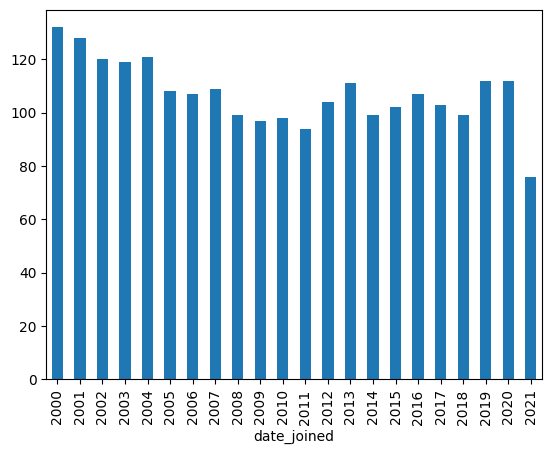

In [86]:
import matplotlib

%matplotlib inline

df.user_id.groupby([df.date_joined.dt.year]).count().plot(kind="bar")